### 1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


### 2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.


### 3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

## 4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).
                                                  
Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = r"D:\Assignments\Decision Tree\heart_disease.xlsx"
heart_disease_data = pd.read_excel(file_path, sheet_name='Heart_disease')

# Task 1: Data Preparation
# Check for missing values and fill them
heart_disease_data['oldpeak'] = heart_disease_data['oldpeak'].fillna(heart_disease_data['oldpeak'].median())

# Separate categorical and numerical columns
categorical_cols = heart_disease_data.select_dtypes(include=['object', 'bool']).columns
numerical_cols = heart_disease_data.select_dtypes(exclude=['object', 'bool']).columns

print("Categorical Columns:", categorical_cols)
print("\nNumerical Columns:", numerical_cols)

# Handle missing values
# Fill missing values in numerical columns with mean
imputer = SimpleImputer(strategy='mean')
heart_disease_data[numerical_cols] = imputer.fit_transform(heart_disease_data[numerical_cols])

# Fill missing values in categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
heart_disease_data[categorical_cols] = imputer.fit_transform(heart_disease_data[categorical_cols])

# Ensure all categorical data is of string type to avoid mixed types
heart_disease_data[categorical_cols] = heart_disease_data[categorical_cols].astype(str)

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    heart_disease_data[col] = le.fit_transform(heart_disease_data[col])

# Scale numerical features
scaler = StandardScaler()
heart_disease_data[numerical_cols] = scaler.fit_transform(heart_disease_data[numerical_cols])



Categorical Columns: Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

Numerical Columns: Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')


Descriptive Statistics:
                 age         sex          cp      trestbps          chol  \
count  9.080000e+02  908.000000  908.000000  9.080000e+02  9.080000e+02   
mean   2.034594e-16    0.790749    0.777533 -3.364905e-16 -1.252058e-16   
std    1.000551e+00    0.406998    0.958374  1.000551e+00  1.000551e+00   
min   -2.708608e+00    0.000000    0.000000 -6.543805e+00 -1.798388e+00   
25%   -6.600961e-01    1.000000    0.000000 -6.586745e-01 -2.207731e-01   
50%    2.274119e-02    1.000000    0.000000 -1.682469e-01  2.009656e-01   
75%    6.782649e-01    1.000000    2.000000  5.183517e-01  6.115471e-01   
max    2.535582e+00    1.000000    3.000000  3.264746e+00  3.583801e+00   

              fbs     restecg        thalch       exang       oldpeak  \
count  908.000000  908.000000  9.080000e+02  908.000000  9.080000e+02   
mean     0.203744    0.991189 -2.504115e-16    1.761013  6.260288e-17   
std      0.403003    0.635177  1.000551e+00    0.983401  1.000551e+00   
min    

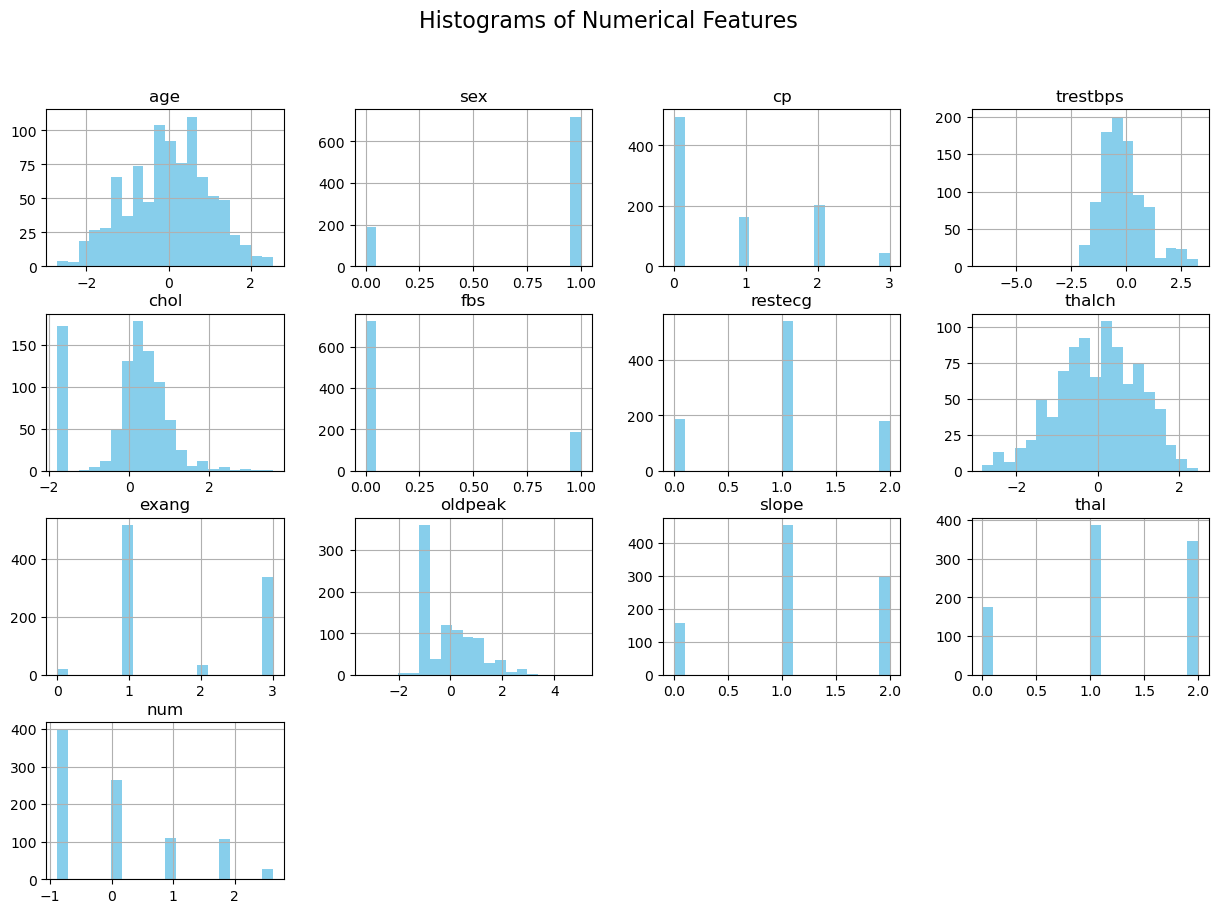

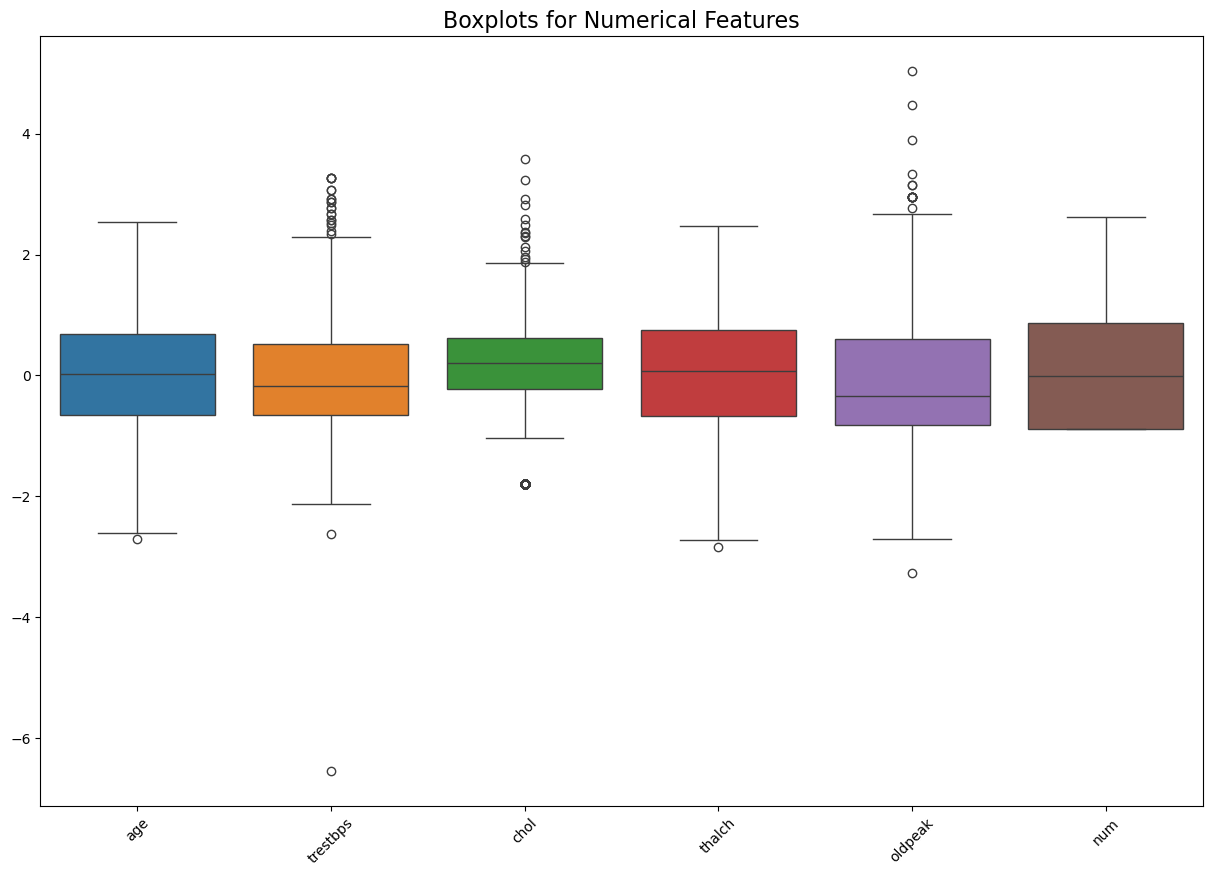

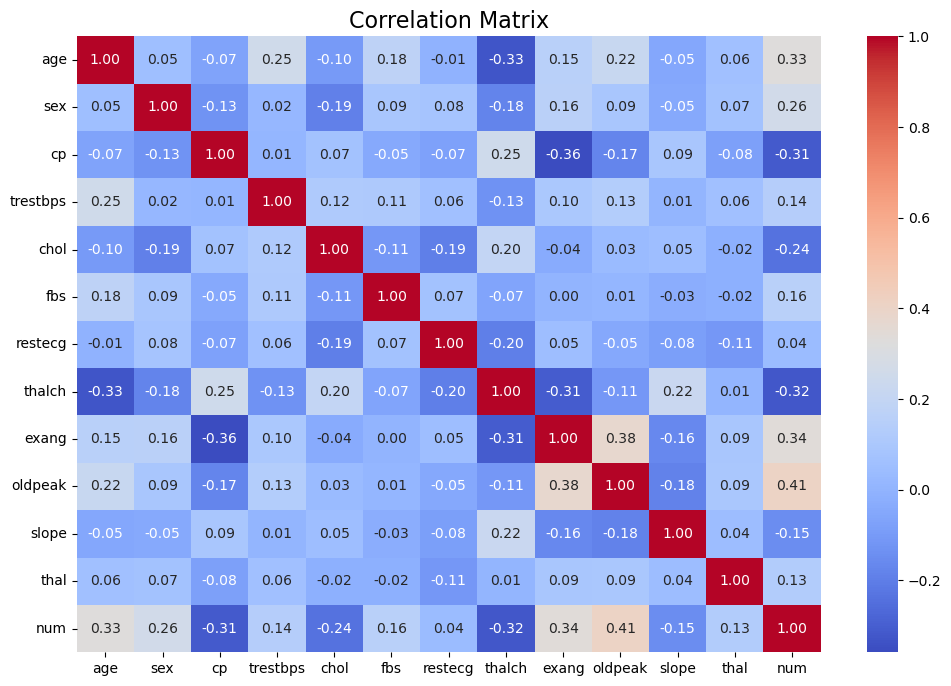

In [10]:
# Task 2: Exploratory Data Analysis
# Descriptive statistics
print("Descriptive Statistics:\n", heart_disease_data.describe())

# Histograms for numerical column
heart_disease_data.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=heart_disease_data[numerical_cols])
plt.title("Boxplots for Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Correlation matrix for numerical columns
correlation_matrix = heart_disease_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    heart_disease_data[col] = le.fit_transform(heart_disease_data[col])

# Scale numerical features
scaler = StandardScaler()
heart_disease_data[numerical_cols] = scaler.fit_transform(heart_disease_data[numerical_cols])

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert 'num' to discrete classes because we can apply decision tree classifier to continious target values ((or)) we can apply directly decision tree regressor.
heart_disease_data['num'] = pd.cut(heart_disease_data['num'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

# Split the dataset into training and testing sets
X = heart_disease_data.drop('num', axis=1)
y = heart_disease_data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7362637362637363

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       137
           1       0.47      0.49      0.48        45

    accuracy                           0.74       182
   macro avg       0.65      0.65      0.65       182
weighted avg       0.74      0.74      0.74       182


Confusion Matrix:
 [[112  25]
 [ 23  22]]


### 5. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth,
minimum samples split, and criterion.

### 6. Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [14]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.7562588568729334


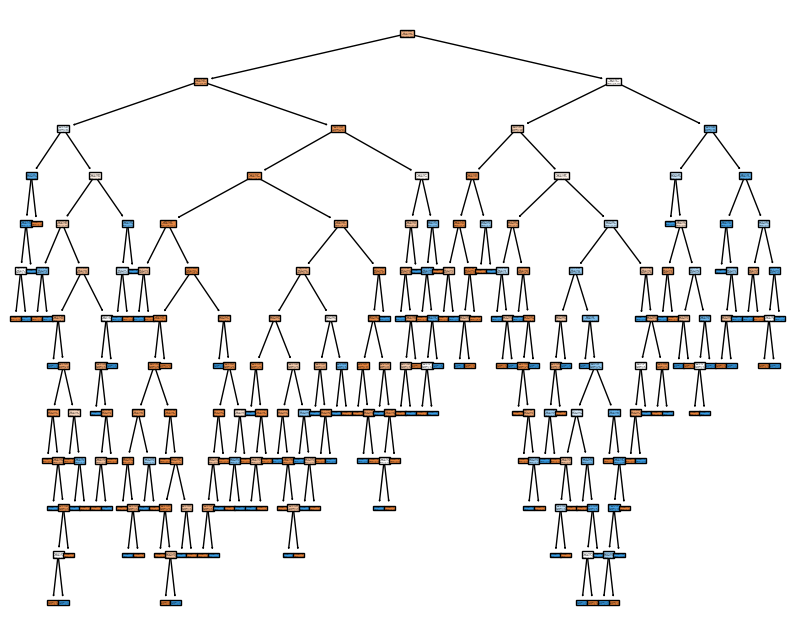

In [15]:
from sklearn.tree import plot_tree

# Visualize the decision tree structure
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True)
plot_params = {'fontsize': 8}
plt.show()